Thinkful Bootcamp Course

Author: Ian Heaton

Email: iheaton@gmail.com

Mentor: Nemanja Radojkovic

Date: 2017/05/24


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from time import time
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
%matplotlib inline


sb.set_style('darkgrid')
my_dpi = 96

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# More clusters?


In [2]:
data_path = ("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")
df = pd.read_csv(data_path)

print('Number of features is %d\n' % (df.shape[1]))
# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

labels = y
n_samples, n_features = X.shape
print('Observations : %d' % (n_samples))
sample_size = 150
# Normalize the data.
X_norm = normalize(X)
df.head()

Number of features is 14

Observations : 302


,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [3]:
def bench_k_means(estimator, name, data):
    results = {'time':0, 'inertia':0, 'homo':0, 'compl':0, 'v-meas':0, 'ARI':0, 'silhouette':0}
    print(79 * '_')
    print('% 9s' % 'init''         time   inertia   homo   compl   v-meas   ARI   silhouette')
    t0 = time()
    estimator.fit(data)
    results['time'] = (time() - t0)
    results['inertia'] =  estimator.inertia_
    results['homo'] = metrics.homogeneity_score(labels, estimator.labels_)
    results['compl'] = metrics.completeness_score(labels, estimator.labels_)
    results['v-meas'] = metrics.v_measure_score(labels, estimator.labels_)
    results['ARI'] = metrics.adjusted_rand_score(labels, estimator.labels_)
    results['silhouette'] = metrics.silhouette_score(data, estimator.labels_, metric='euclidean', sample_size=sample_size)
    print('%s % 7.2fs % 5i % 10.3f % 5.3f % 7.3f % 7.3f % 7.3f'
      % (name, results['time'], results['inertia'], results['homo'], results['compl'], results['v-meas'],
         results['ARI'], results['silhouette']))
    print(79 * '_')
    return results


The <b>homogeneity</b> score is a simple, zero-to-one-bounded measure of the degree to which clusters contain only assignments of a given class. A score of one indicates that all clusters contain measurements from a single class. This measure is complimented by the <b>completeness score</b>, which is a similarly bounded measure of the extent to which all members of a given class are assigned to the same cluster. As such, a completeness score and homogeneity score of one indicates a perfect clustering solution.

The <b>validity</b> measure (v-measure) is a harmonic mean of the homogeneity and completeness scores, which is exactly analogous to the F-measure for binary classification. In essence, it provides a single, 0-1-scaled value to monitor both homogeneity and completeness.

The <b>Adjusted Rand Index</b> (ARI) is a similarity measure that tracks the consensus between sets of assignments. As applied to clustering, it measures the consensus between the true, pre-existing observation labels and the labels predicted as an output of the clustering algorithm. The Rand index measures labeling similarity on a 0-1 bound scale, with one equaling perfect prediction labels.

The main challenge with all of the preceding performance measures as well as other similar measures (for example, Akaike's mutual information criterion) is that they require an understanding of the ground truth, that is, they require some or all of the data under inspection to be labeled. If labels do not exist and cannot be generated, these measures won't work. In practice, this is a pretty substantial drawback as very few datasets come prelabeled and the creation of labels can be time-consuming.

One option to measure the performance of a k-means clustering solution without labeled data is the <b>Silhouette Coefficient</b>. This is a measure of how well-defined the clusters within a model are. This score is bounded between -1 and 1, with -1 indicating incorrect clustering, 1 indicating very dense clustering, and scores around 0 indicating overlapping clusters. 

### Number of Clusters : 2, No PCA

In [4]:

__ = bench_k_means(KMeans(init='k-means++', n_clusters=2, n_init=10), name="k-means++", data=X_norm)

_______________________________________________________________________________
init         time   inertia   homo   compl   v-meas   ARI   silhouette
k-means++    0.03s     2      0.031  0.031   0.031   0.039   0.411
_______________________________________________________________________________


### Number of Clusters : 3, No PCA

In [5]:
y = df.iloc[:, 13]
labels = y
__ = bench_k_means(KMeans(init='k-means++', n_clusters=3, n_init=10), name="k-means++", data=X_norm)

_______________________________________________________________________________
init         time   inertia   homo   compl   v-meas   ARI   silhouette
k-means++    0.06s     2      0.025  0.030   0.027   0.015   0.271
_______________________________________________________________________________


### Number of Clusters : 2 with PCA 2 Components

In [6]:
# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)
y = np.where(y > 0, 0, 1)
labels = y
__ = bench_k_means(KMeans(init='k-means++', n_clusters=2, n_init=10), name="k-means++", data=X_pca)

_______________________________________________________________________________
init         time   inertia   homo   compl   v-meas   ARI   silhouette
k-means++    0.05s     2      0.031  0.031   0.031   0.039   0.354
_______________________________________________________________________________


### Number of Clusters : 3 with PCA 3 Components

In [7]:
# Reduce it to three components.
X_pca = PCA(3).fit_transform(X_norm)
y = df.iloc[:, 13]
labels = y
__ = bench_k_means(KMeans(init='k-means++', n_clusters=3, n_init=10), name="k-means++", data=X_pca)

_______________________________________________________________________________
init         time   inertia   homo   compl   v-meas   ARI   silhouette
k-means++    0.04s     2      0.025  0.029   0.027   0.013   0.291
_______________________________________________________________________________


### Iterating without PCA with number of clusters from 2 through 11 

In [8]:
y = df.iloc[:, 13]
labels = y
vmeas_results = []
ari_results = []
homo_results = []
silhouette_results = []
for cluster in range(2, 12):
    print('==== Using %d Clusters ====' % (cluster))
    result = bench_k_means(KMeans(init='k-means++', n_clusters=cluster, n_init=10), name="k-means++", data=X_norm)
    vmeas_results.append(result['v-meas'])
    ari_results.append(result['ARI'])
    homo_results.append(result['homo'])
    silhouette_results.append(result['silhouette'])


==== Using 2 Clusters ====
_______________________________________________________________________________
init         time   inertia   homo   compl   v-meas   ARI   silhouette
k-means++    0.07s     2      0.018  0.033   0.023   0.026   0.342
_______________________________________________________________________________
==== Using 3 Clusters ====
_______________________________________________________________________________
init         time   inertia   homo   compl   v-meas   ARI   silhouette
k-means++    0.07s     2      0.024  0.029   0.026   0.015   0.304
_______________________________________________________________________________
==== Using 4 Clusters ====
_______________________________________________________________________________
init         time   inertia   homo   compl   v-meas   ARI   silhouette
k-means++    0.09s     1      0.057  0.054   0.056   0.056   0.314
_______________________________________________________________________________
==== Using 5 Clusters ===

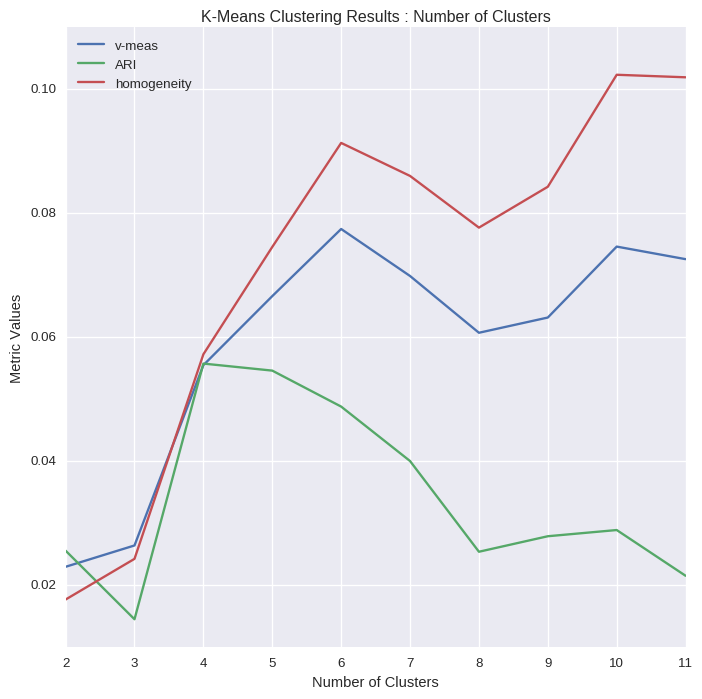

In [9]:
# plot cluster results
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.xlabel('Number of Clusters')
plt.ylabel('Metric Values')
plt.plot(list(range(2, 12)), vmeas_results)
plt.plot(list(range(2, 12)), ari_results)
plt.plot(list(range(2, 12)), homo_results)
plt.legend(['v-meas', 'ARI', 'homogeneity'], loc='upper left')
__ = plt.title('K-Means Clustering Results : Number of Clusters')

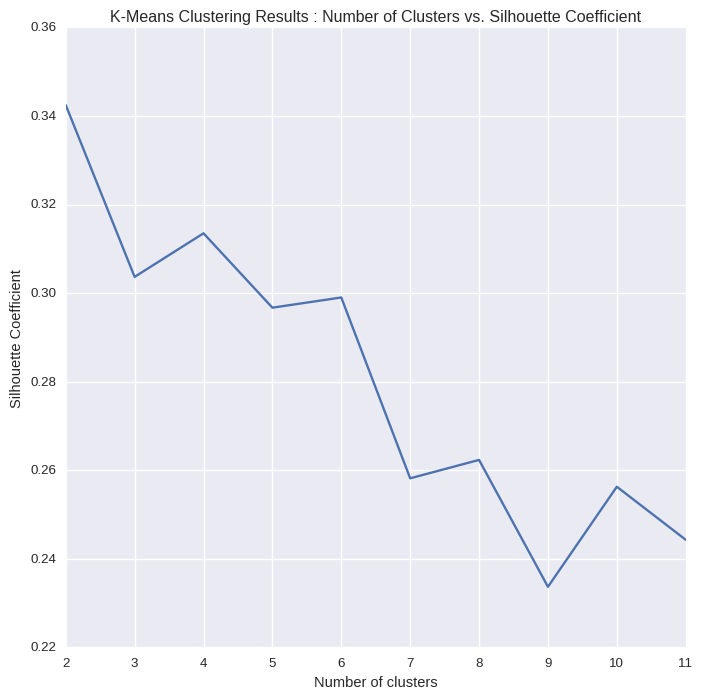

In [10]:
# plot the silhouette Coefficient
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.plot(list(range(2, 12)), silhouette_results)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
__ = plt.title('K-Means Clustering Results : Number of Clusters vs. Silhouette Coefficient')

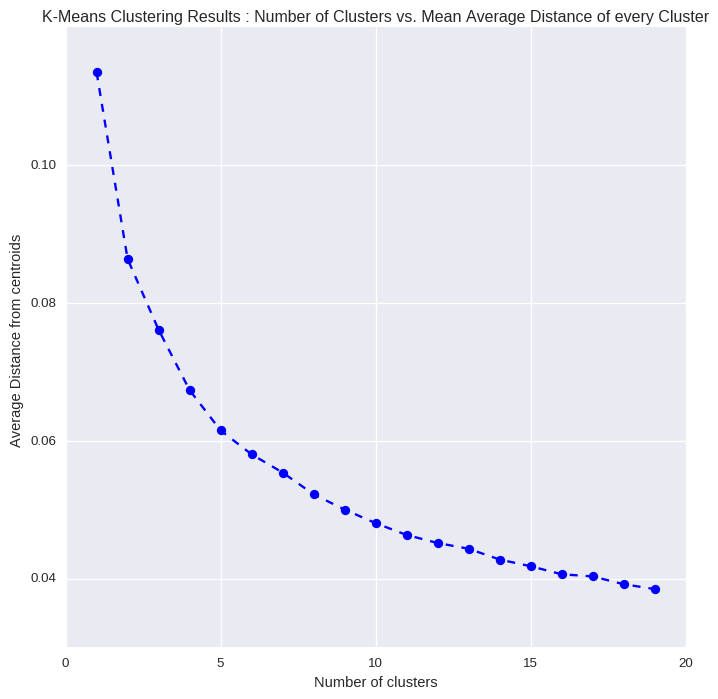

In [13]:
from scipy.spatial.distance import cdist


K = range(1,20)
avg_distance= []
for k in K:
    kmeans = KMeans(init = 'k-means++', n_clusters=k, n_init=k)
    kmeans.fit(X_norm)
    avg_distance.append(sum(np.min(cdist(X_norm, kmeans.cluster_centers_, 'euclidean'), axis=1))/X.shape[0])

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.xlabel('Number of clusters')
plt.ylabel('Average Distance from centroids ')
plt.title('K-Means Clustering Results : Number of Clusters vs. Mean Average Distance of every Cluster')
__ = plt.plot(K, avg_distance, marker='o', linestyle='--', color='b')

## Conclusions

Principle Component Analysis appears to have no effect on the time taken to compute the clusters or the outcome.   It appears fro the above graph that the optimal number of clusters is 4.  At four three metrics have the best value.  The validity measure has a value of 0.062. The Adjusted Rand Index has a value of 0.069 and the homogeneity value is 0.060. Not great scores. Clusters greater than 4 result in overfitting. 

The plot showing the Silhouette Coefficient depicts the optimal number of clusters to be 2.  The coefficient value is at its maximum when the number of clusters is two.  As the number of clusters increases the coefficient values decreases quickly. 

The risk is that as k increases, the Silhouette Coefficient or unexplained variance may decrease dramatically, without meaningful clusters being formed. The extreme case of this would be if k = o, where o is the number of observations in the sample; every point would have its own cluster, the Silhouette Coefficient would be low, but the results wouldn't be meaningful. There are, however, many less extreme cases in which overfitting may occur due to an overly high k value.

To mitigate this risk, it's advisable to use supporting techniques to motivate a selection of k. One useful technique in this context is the elbow method. The elbow method is a very simple technique; for each instance of k, plot the percentage of explained variance against k.

The last graph is the number of clusters plotted against the explained variance.  The optimal number of clusters is 2 or perhaps 3. The values of explained variance shown on the graph is quite low to begin with.